In [1]:
#importing tenserflow to create the neural networks
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as p
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE,RandomOverSampler 

#will use random forest to compare
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#will use svm rbf to compare as well
from sklearn.pipeline import Pipeline
from sklearn import svm, metrics

In [2]:
#getting data & splitting into training and testing sets
data = p.read_csv('.\clean_data\creditcard_application_clean_data.csv')
train, test = train_test_split(data, test_size=0.2)
x_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
x_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

# _s endings mean that they are datasets that have smote over sampling
smote = SMOTE(random_state=31)
x_train_s, y_train_s = smote.fit_resample(x_train,y_train)

ros = RandomOverSampler(random_state=42)
X_train_r, y_train_r = ros.fit_resample(x_train, y_train)
# print('Resampled dataset shape %s' % Counter(y_train_s))


In [3]:
def printGraph(title, hist, leg_loc='lower right'):
    acc = hist.history['accuracy']
    val = hist.history['val_accuracy']
    loss = hist.history['loss']
    loss_val = hist.history['val_loss']

    epochs = range(1, len(acc) + 1)
 
    plt.plot(epochs, acc, '-', label='Training accuracy')
    plt.plot(epochs, val, ':', label='Validation accuracy')
    plt.plot(epochs, loss_val, ':', label='Validation loss')
    plt.plot(epochs, loss, '-', label="Loss")
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc=leg_loc)
    plt.grid(linestyle='-',  color='black', visible=True)
    plt.plot()

def printConfusionMatrix(model, X_test, Y_test, name='model'):
    y_predicted = model.predict(X_test) > 0.5
    mat = confusion_matrix(Y_test, y_predicted)
    labels = ['ACCEPTED', 'DENIED']
 
    sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

    plt.title(name + " confusion_matrix ")
    plt.xlabel('Predicted label')
    plt.ylabel('Actual label')

In [4]:
#model_2 -> second version of model & data was fidded with no sampling techniques
# _s the model is fidded data that was oversampled using smote
# _r model is fidded with data that was RandomOverSampler
# _h model is fidded with oversampled data but the layers activation all relu
model_= keras.Sequential(
    [
        layers.Dense(22, activation="relu", name="layer_A"),
        layers.Dense(10, activation="relu", name="layer_B"),
        layers.Dense(10, activation="relu", name="layer_C"),
        layers.Dense(5, activation="relu", name="layer_D"),
        layers.Dense(1, activation="sigmoid")
    ]
)
model_2_relu_actv = keras.Sequential(
    [
        layers.Dense(22, activation="relu", name="layer_A"),
        layers.Dense(10, activation="relu", name="layer_B"),
        layers.Dense(10, activation="relu", name="layer_C"),
        layers.Dense(5, activation="relu", name="layer_D"),
        layers.Dense(1, activation="relu")
    ]
) 

model_.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

# compiling the models
model_2 = model_
model_2_smote = model_
model_2_rand = model_
model_2_relu_actv.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

# setting up early stopping, monitering loss 
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', mode='min', verbose=1, patience=2)

In [5]:
#fiting the first NN
hist = model_2.fit(x_train,y_train, epochs=50, validation_data=(x_test, y_test), batch_size=128, verbose=1, callbacks=[callback])

Epoch 1/50
228/228 [==============================] - 3s 4ms/step - loss: 0.5549 - accuracy: 0.7995 - val_loss: 0.3660 - val_accuracy: 0.8829
Epoch 2/50
228/228 [==============================] - 1s 2ms/step - loss: 0.3657 - accuracy: 0.8822 - val_loss: 0.3609 - val_accuracy: 0.8829
Epoch 3/50
228/228 [==============================] - 0s 2ms/step - loss: 0.3629 - accuracy: 0.8822 - val_loss: 0.3601 - val_accuracy: 0.8829
Epoch 4/50
228/228 [==============================] - 1s 4ms/step - loss: 0.3623 - accuracy: 0.8822 - val_loss: 0.3598 - val_accuracy: 0.8829
Epoch 5/50
228/228 [==============================] - 1s 5ms/step - loss: 0.3613 - accuracy: 0.8822 - val_loss: 0.3596 - val_accuracy: 0.8829
Epoch 6/50
228/228 [==============================] - 1s 4ms/step - loss: 0.3610 - accuracy: 0.8822 - val_loss: 0.3594 - val_accuracy: 0.8829
Epoch 7/50
228/228 [==============================] - 0s 2ms/step - loss: 0.3607 - accuracy: 0.8822 - val_loss: 0.3598 - val_accuracy: 0.8829
Epoch 

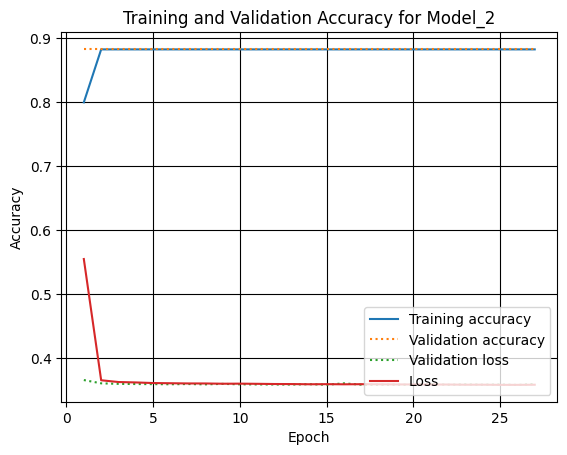

In [6]:
printGraph("Training and Validation Accuracy for Model_2", hist)

228/228 [==============================] - 0s 989us/step


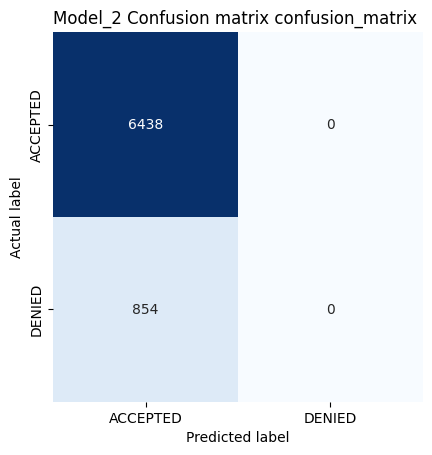

In [7]:
printConfusionMatrix(model_2, x_test, y_test, name="Model_2 Confusion matrix")

In [8]:
# the model is fidded data that was oversampled using smote
hist_s = model_2_smote.fit(x_train_s,y_train_s, epochs=100, validation_data=(x_test, y_test), batch_size=128, verbose=1, callbacks=[callback])

Epoch 1/100
402/402 [==============================] - 2s 2ms/step - loss: 0.6919 - accuracy: 0.5218 - val_loss: 0.6891 - val_accuracy: 0.5030
Epoch 2/100
402/402 [==============================] - 1s 2ms/step - loss: 0.6886 - accuracy: 0.5370 - val_loss: 0.7195 - val_accuracy: 0.3796
Epoch 3/100
402/402 [==============================] - 1s 2ms/step - loss: 0.6856 - accuracy: 0.5449 - val_loss: 0.7126 - val_accuracy: 0.3902
Epoch 4/100
402/402 [==============================] - 1s 2ms/step - loss: 0.6829 - accuracy: 0.5513 - val_loss: 0.6466 - val_accuracy: 0.7253
Epoch 5/100
402/402 [==============================] - 1s 2ms/step - loss: 0.6808 - accuracy: 0.5572 - val_loss: 0.6880 - val_accuracy: 0.4982
Epoch 6/100
402/402 [==============================] - 1s 2ms/step - loss: 0.6793 - accuracy: 0.5594 - val_loss: 0.7076 - val_accuracy: 0.4229
Epoch 7/100
402/402 [==============================] - 1s 2ms/step - loss: 0.6771 - accuracy: 0.5602 - val_loss: 0.7149 - val_accuracy: 0.4344

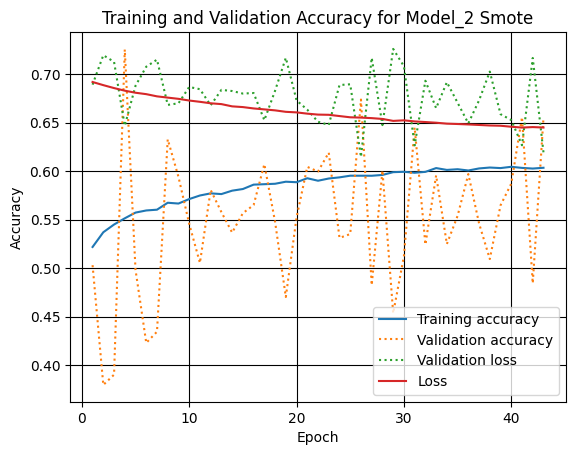

In [9]:
printGraph("Training and Validation Accuracy for Model_2 Smote", hist_s)

228/228 [==============================] - 1s 2ms/step


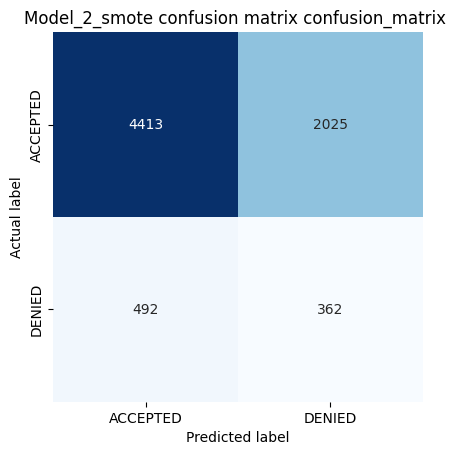

In [10]:
printConfusionMatrix(model_2_smote, x_test, y_test, name="Model_2_smote confusion matrix")

In [11]:
# model is fidded with data that was RandomOverSampler
hist_r = model_2_rand.fit(X_train_r,y_train_r, epochs=100, validation_data=(x_test, y_test), batch_size=128, verbose=1, callbacks=[callback])

Epoch 1/100
402/402 [==============================] - 2s 2ms/step - loss: 0.6923 - accuracy: 0.5196 - val_loss: 0.6894 - val_accuracy: 0.4098
Epoch 2/100
402/402 [==============================] - 1s 2ms/step - loss: 0.6911 - accuracy: 0.5314 - val_loss: 0.6939 - val_accuracy: 0.3869
Epoch 3/100
402/402 [==============================] - 1s 3ms/step - loss: 0.6901 - accuracy: 0.5358 - val_loss: 0.6575 - val_accuracy: 0.7270
Epoch 4/100
402/402 [==============================] - 1s 2ms/step - loss: 0.6885 - accuracy: 0.5404 - val_loss: 0.6843 - val_accuracy: 0.4908
Epoch 5/100
402/402 [==============================] - 1s 2ms/step - loss: 0.6864 - accuracy: 0.5481 - val_loss: 0.7004 - val_accuracy: 0.3998
Epoch 6/100
402/402 [==============================] - 1s 2ms/step - loss: 0.6849 - accuracy: 0.5534 - val_loss: 0.6437 - val_accuracy: 0.7208
Epoch 7/100
402/402 [==============================] - 1s 2ms/step - loss: 0.6831 - accuracy: 0.5553 - val_loss: 0.6702 - val_accuracy: 0.5782

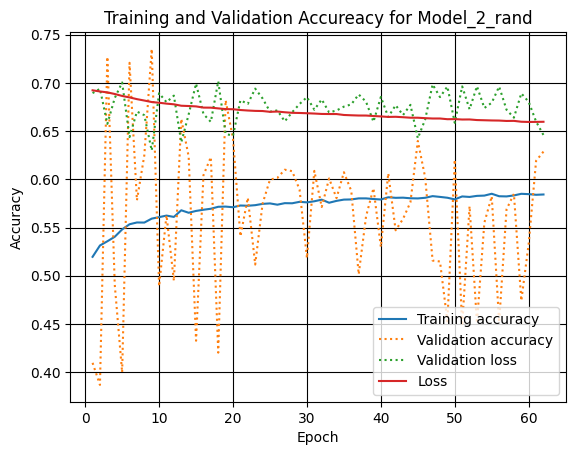

In [12]:
printGraph("Training and Validation Accureacy for Model_2_rand", hist_r)

228/228 [==============================] - 0s 858us/step


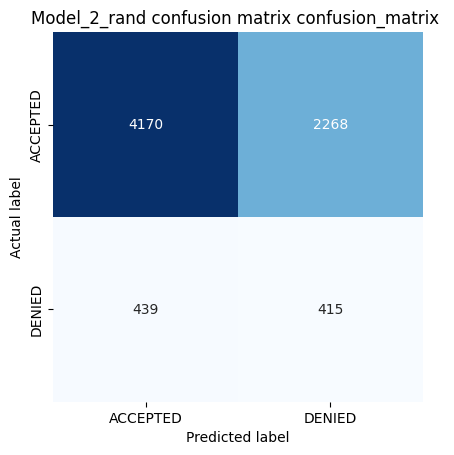

In [13]:
printConfusionMatrix(model_2_rand, x_test,y_test,name="Model_2_rand confusion matrix")

In [14]:
# model is fidded with oversampled data but the layers activation all relu
hist_h = model_2_relu_actv.fit(X_train_r,y_train_r, epochs=100, validation_data=(x_test, y_test), batch_size=128, verbose=1, callbacks=[callback])

Epoch 1/100
402/402 [==============================] - 2s 2ms/step - loss: 0.7178 - accuracy: 0.5090 - val_loss: 0.6619 - val_accuracy: 0.6403
Epoch 2/100
402/402 [==============================] - 1s 1ms/step - loss: 0.6917 - accuracy: 0.5228 - val_loss: 0.6702 - val_accuracy: 0.6507
Epoch 3/100
402/402 [==============================] - 1s 1ms/step - loss: 0.6883 - accuracy: 0.5345 - val_loss: 0.6654 - val_accuracy: 0.6738
Epoch 4/100
402/402 [==============================] - 1s 1ms/step - loss: 0.6862 - accuracy: 0.5363 - val_loss: 0.6682 - val_accuracy: 0.6905
Epoch 5/100
402/402 [==============================] - 1s 1ms/step - loss: 0.6847 - accuracy: 0.5422 - val_loss: 0.6570 - val_accuracy: 0.7264
Epoch 6/100
402/402 [==============================] - 1s 1ms/step - loss: 0.6830 - accuracy: 0.5459 - val_loss: 0.6674 - val_accuracy: 0.6728
Epoch 7/100
402/402 [==============================] - 1s 1ms/step - loss: 0.6817 - accuracy: 0.5513 - val_loss: 0.7098 - val_accuracy: 0.4752

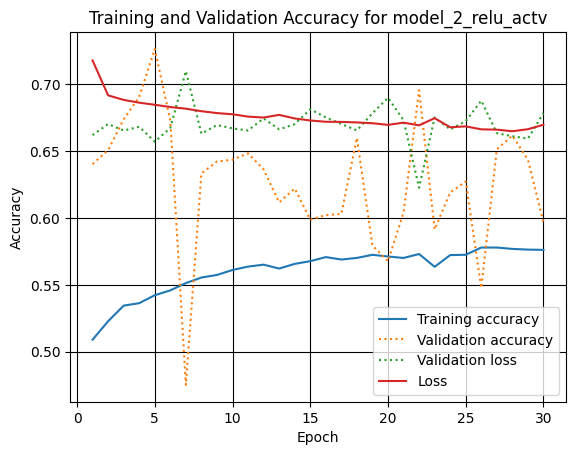

In [15]:
printGraph("Training and Validation Accuracy for model_2_relu_actv", hist_h)

228/228 [==============================] - 0s 856us/step


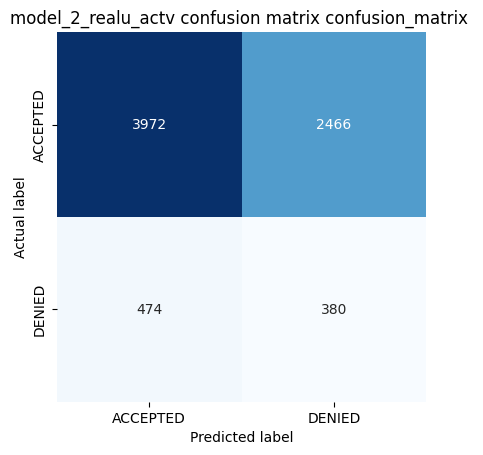

In [16]:
printConfusionMatrix(model_2_relu_actv, x_test, y_test, name="model_2_realu_actv confusion matrix")

Accuracy Score is 0.88289
      0  1
0  6438  0
1   854  0


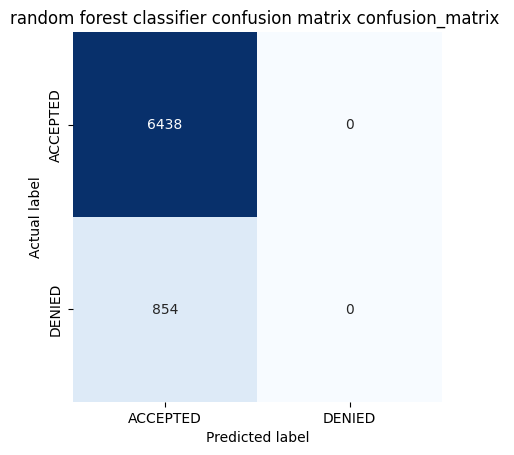

In [17]:
#random forest classifier
model_forest = RandomForestClassifier(n_estimators=250,
                              max_depth=12,
                              min_samples_leaf=16
                              )
#fidding data with no oversampling
model_forest.fit(x_train, y_train)
y_predict = model_forest.predict(x_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(p.DataFrame(confusion_matrix(y_test,y_predict)))

printConfusionMatrix(model_forest, x_test, y_test, name="random forest classifier confusion matrix")

Accuracy Score is 0.79526
      0    1
0  5481  957
1   536  318


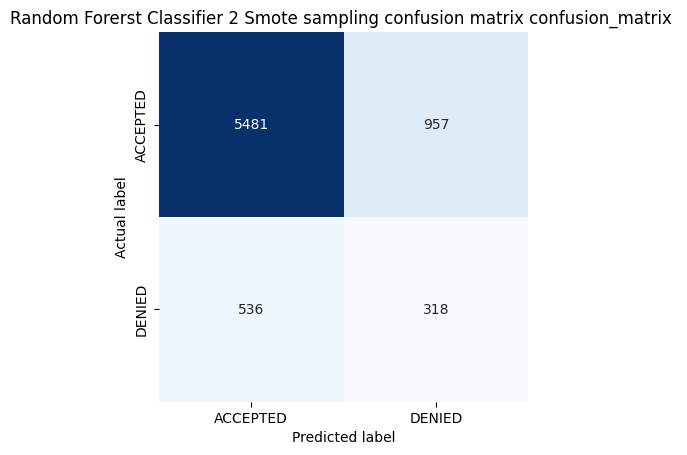

In [18]:
model_forest_smote = RandomForestClassifier(n_estimators=250,
                              max_depth=12,
                              min_samples_leaf=16
                              )
#fidding data with oversampled data using smote
model_forest_smote.fit(x_train_s, y_train_s)
y_predict = model_forest_smote.predict(x_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(p.DataFrame(confusion_matrix(y_test,y_predict)))

printConfusionMatrix(model_forest_smote, x_test,y_test,name="Random Forerst Classifier 2 Smote sampling confusion matrix")

Accuracy Score is 0.76152
      0     1
0  5123  1315
1   424   430


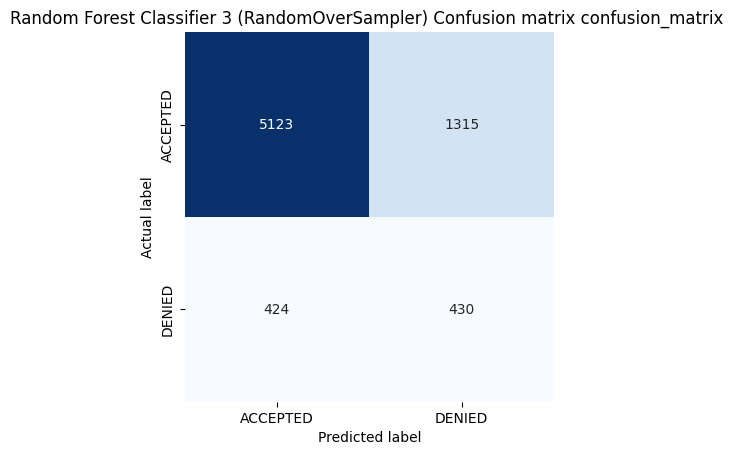

In [19]:
model_forest_over = RandomForestClassifier(n_estimators=250,
                              max_depth=12,
                              min_samples_leaf=16
                              )
#fidding data with oversampled data using RandomOverSampler
model_forest_over.fit(X_train_r, y_train_r)
y_predict = model_forest_over.predict(x_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(p.DataFrame(confusion_matrix(y_test,y_predict)))

printConfusionMatrix(model_forest_over, x_test,y_test,name="Random Forest Classifier 3 (RandomOverSampler) Confusion matrix") 

In [20]:
#building the svm RBF and fidding it with data that has been oversampled using smote

rbf_svm_clf = svm.SVC(kernel="rbf", gamma="auto", C=2, decision_function_shape='ovr')

rbf_svm_clf.fit(x_train_s,y_train_s)

SVC(C=2, gamma='auto')

Classification report for classifier [0 1 0 ... 1 1 0]:
              precision    recall  f1-score   support

           0       0.90      0.57      0.70      6438
           1       0.14      0.55      0.23       854

    accuracy                           0.56      7292
   macro avg       0.52      0.56      0.46      7292
weighted avg       0.82      0.56      0.64      7292




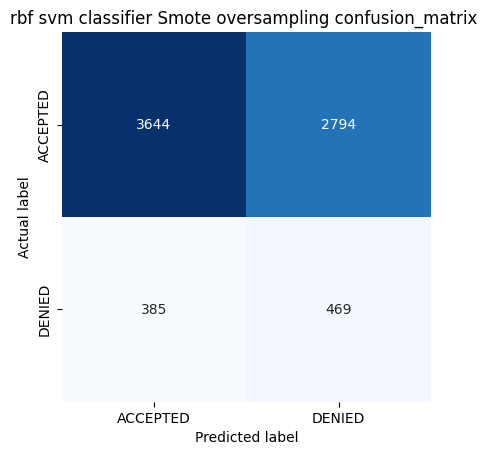

In [21]:
printConfusionMatrix(rbf_svm_clf, x_test,y_test,name="rbf svm classifier Smote oversampling")

predicted_rbf = rbf_svm_clf.predict(x_test)

#disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted_rbf)
#disp.figure_.suptitle("Confusion Matrix for SVM rbf classifier")
print(
    f"Classification report for classifier {predicted_rbf}:\n"
    f"{metrics.classification_report(y_test, predicted_rbf)}\n"
)